# НИРС (Титов А.Д. РТ5-61Б)

## Поиск и выбор набора данных для построения моделей машинного обучения.

В качестве набора данных мы будем использовать набор данных
о ценах на жилье в городе Бостон (США) - https://scikit-learn.org/0.19/modules/generated/sklearn.datasets.load_boston.html

Это задача является довольно актуальной для житилей данной области, в большей части для риелторов и людей, которые хотят продать свое жилищное помощение и должны сравнивать цены с теми, которые уже стоят в продаже или были куплены за ближайшее время.

Датасет содержит следующие колонки:
- CRIM - уровень преступности на душу населения
- ZN - доля земель под жилую застройку зонирована под участки площадью более 25 000 кв. футов.
- INDUS - доля акров неторгового бизнеса на город
- CHAS - фиктивная переменная реки Чарльз (= 1, если участок граничит с рекой; 0 в противном случае)
- NOX - концентрация оксидов азота (частей на 10 миллионов)
- RM - среднее количество комнат в квартире
- AGE - доля жилых единиц, построенных до 1940 г.
- DIS - взвешенные расстояния до пяти центров занятости Бостона
- RAD - индекс доступности к радиальным магистралям
- TAX - полная ставка налога на имущество за 10 000 долларов США
- PTRATIO - соотношение учеников и учителей по городам
- B - 1000(Bk - 0,63) ^ 2, где Bk - доля чернокожих по городам.
- LSTAT - покупательская способность населения в %
- target - средняя стоимость домов, занимаемых владельцами, в 1000 долларов.

В рассматриваемом примере будем решать задачу регрессии:
- Для решения **задачи регрессии** в качестве целевого признака будем использовать "target".

### Импорт библиотек
Импортируем библиотеки с помощью команды import.

In [1]:
import warnings
import numpy as np
import pandas as pd
from sklearn import utils
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline 
sns.set(style="ticks")
warnings.filterwarnings('ignore')

In [2]:
# https://scikit-learn.org/stable/datasets/index.html#boston-dataset
boston = load_boston()

In [3]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
boston.data.shape, boston.target.shape

((506, 13), (506,))

In [5]:
# Сформируем DataFrame
boston_df = pd.DataFrame(data= np.c_[boston['data'], boston['target']],
                     columns= list(boston['feature_names']) + ['target'])

In [6]:
# И выведем его статистические характеристики
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# Проверим датасет на наличие пропусков
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

#### Вывод

В выбранном датасете отсутствуют пропуски, следовательно дополнительно заполнять набор данных не нужно.

In [8]:
# Парные диаграммы
sns.pairplot(boston_df)

In [9]:
sns.pairplot(boston_df, hue="target")

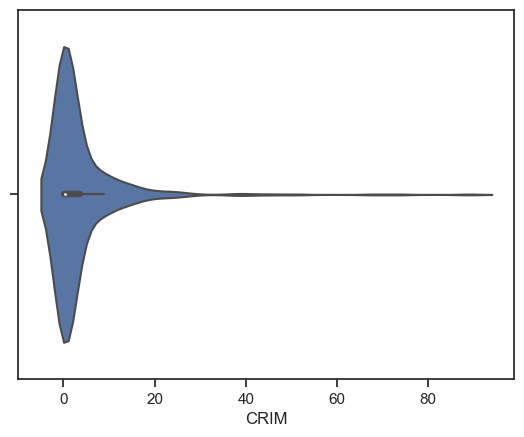

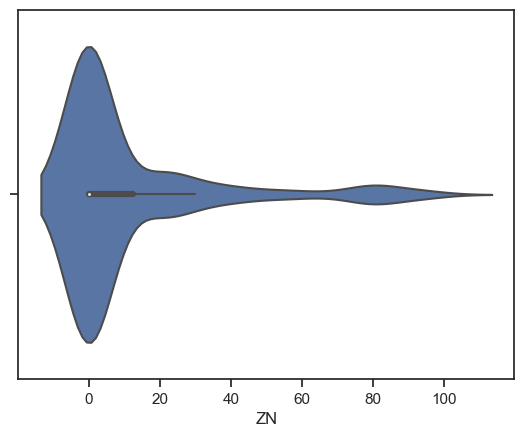

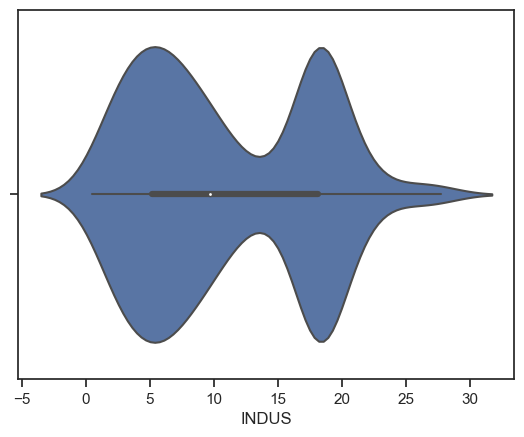

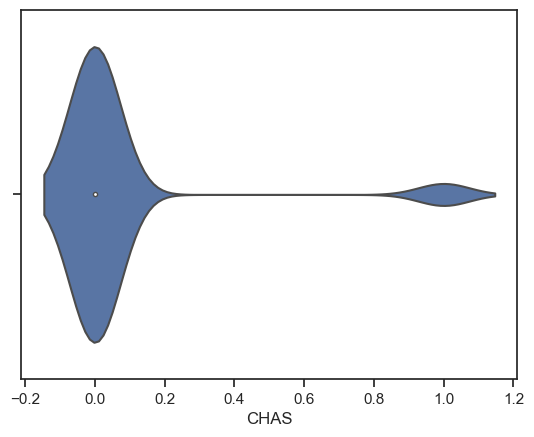

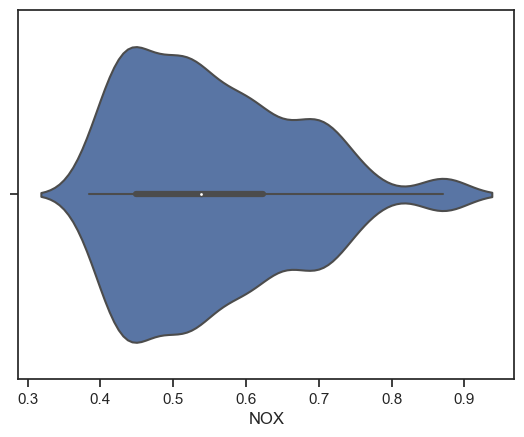

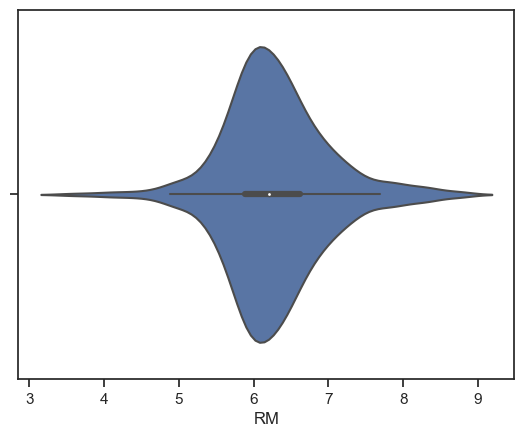

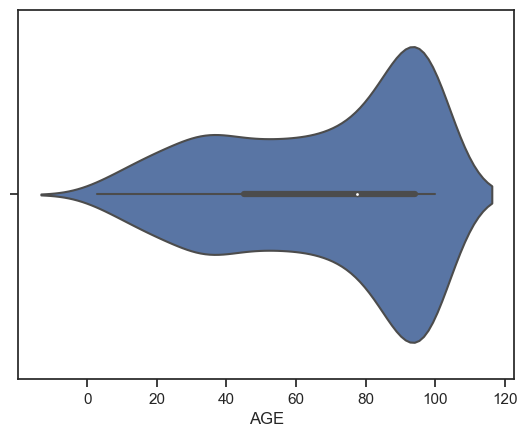

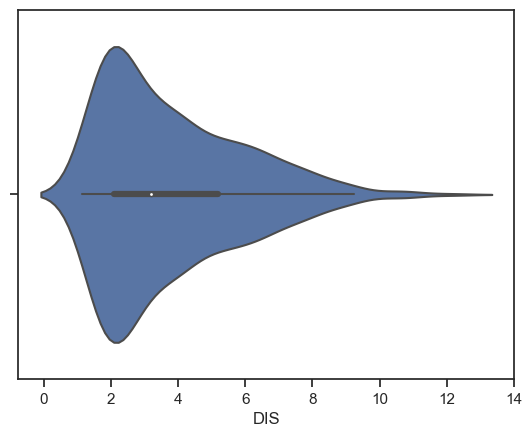

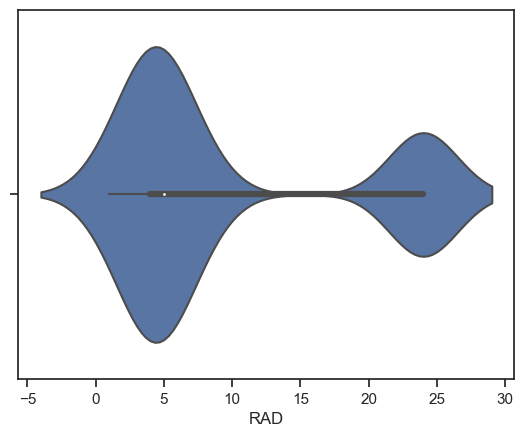

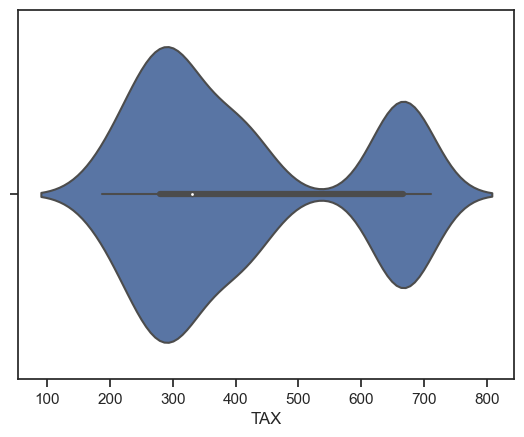

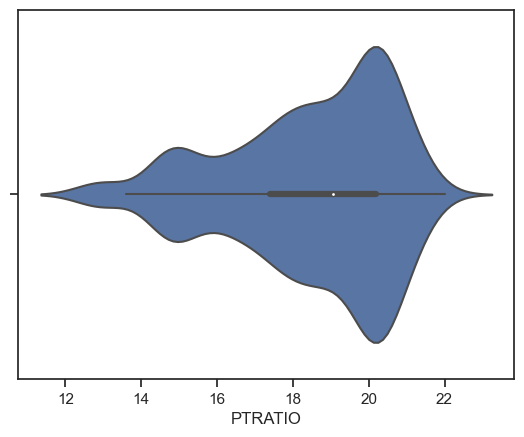

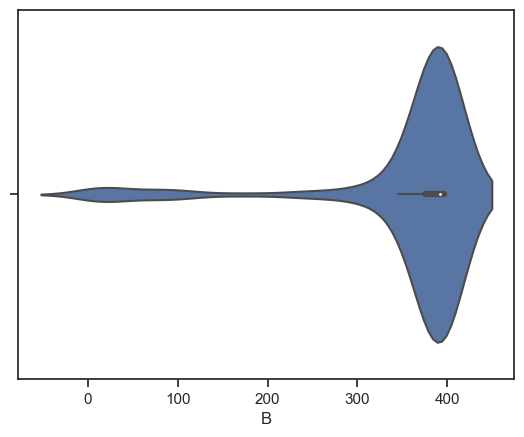

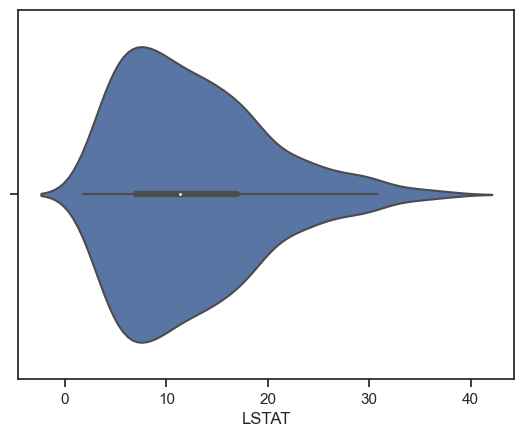

In [10]:
# Скрипичные диаграммы для числовых колонок
for col in ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']:
    sns.violinplot(x=boston_df[col])
    plt.show()

## Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.

Для построения моделей будем использовать все признаки.

Категориальные признаки отсутствуют, их кодирования не требуется.

Вспомогательные признаки для улучшения качества моделей строить не будем.

Выполним масштабирование данных.

In [11]:
# Числовые колонки для масштабирования
scale_cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [12]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(boston_df[scale_cols])

In [13]:
# Добавим масштабированные данные в набор данных
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    boston_df[new_col_name] = sc1_data[:,i]

In [14]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,CHAS_scaled,NOX_scaled,RM_scaled,AGE_scaled,DIS_scaled,RAD_scaled,TAX_scaled,PTRATIO_scaled,B_scaled,LSTAT_scaled
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


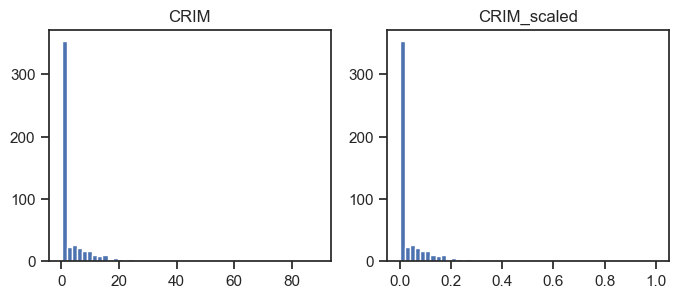

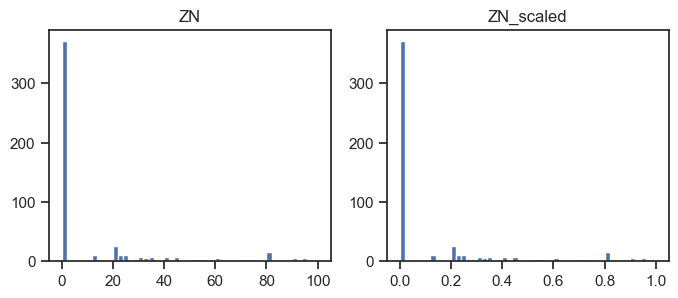

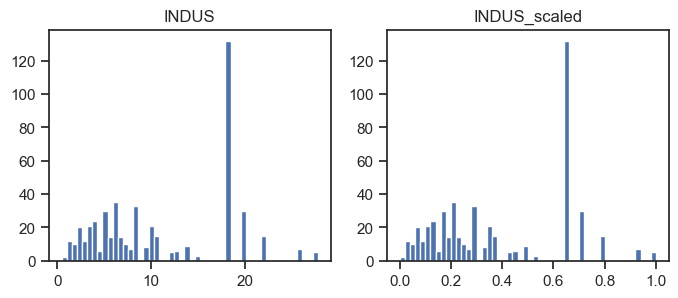

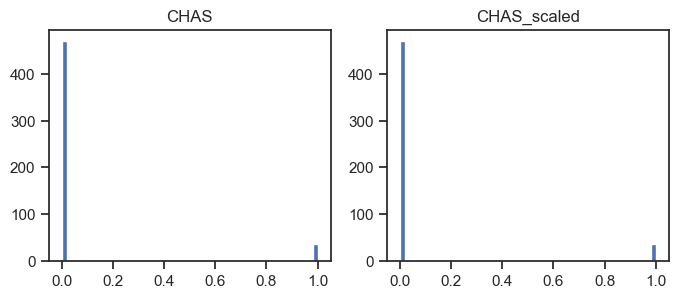

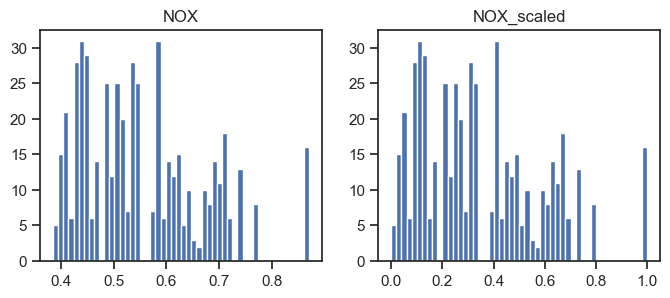

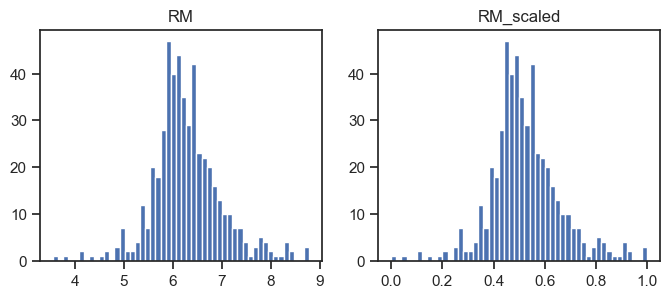

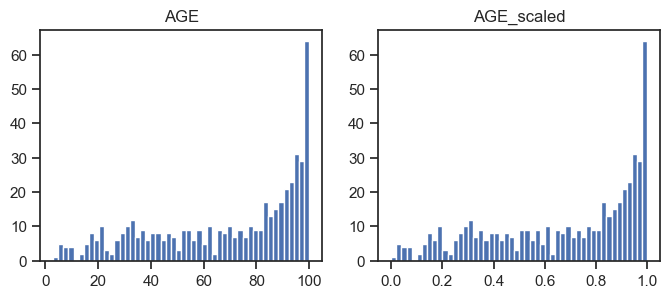

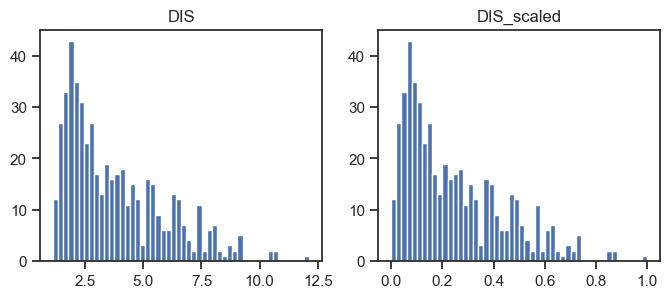

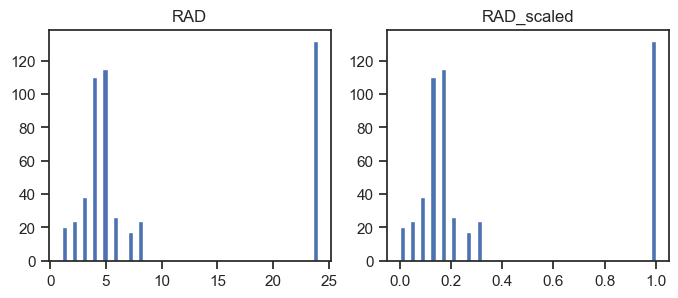

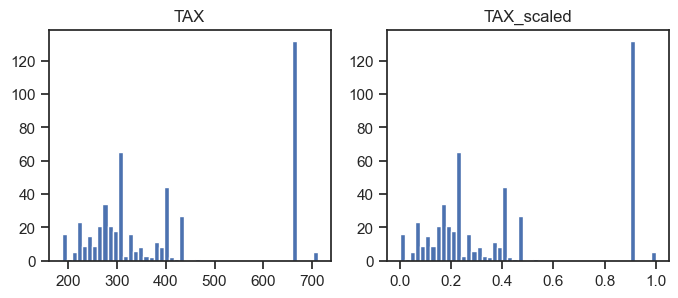

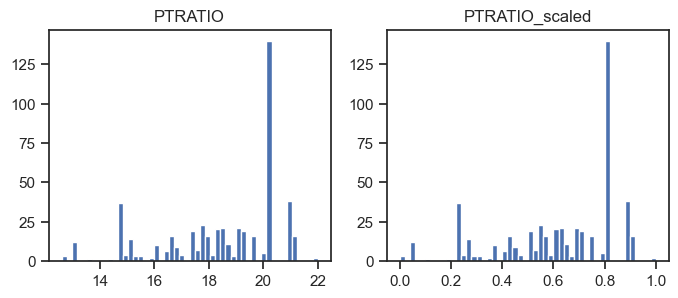

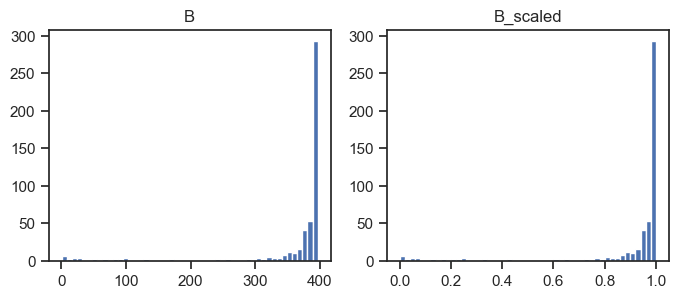

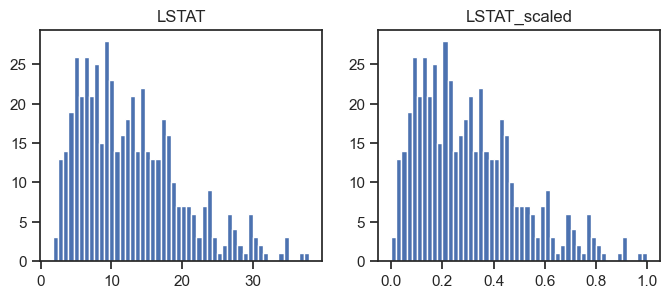

In [15]:
# Проверим, что масштабирование не повлияло на распределение данных
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(boston_df[col], 50)
    ax[1].hist(boston_df[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

## Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. 

In [16]:
# Добавим в колонки целевой признак
corr_cols_1 = scale_cols + ['target']
corr_cols_1

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'target']

In [17]:
scale_cols_postfix = [x+'_scaled' for x in scale_cols]
corr_cols_2 = scale_cols_postfix + ['target']
corr_cols_2

['CRIM_scaled',
 'ZN_scaled',
 'INDUS_scaled',
 'CHAS_scaled',
 'NOX_scaled',
 'RM_scaled',
 'AGE_scaled',
 'DIS_scaled',
 'RAD_scaled',
 'TAX_scaled',
 'PTRATIO_scaled',
 'B_scaled',
 'LSTAT_scaled',
 'target']

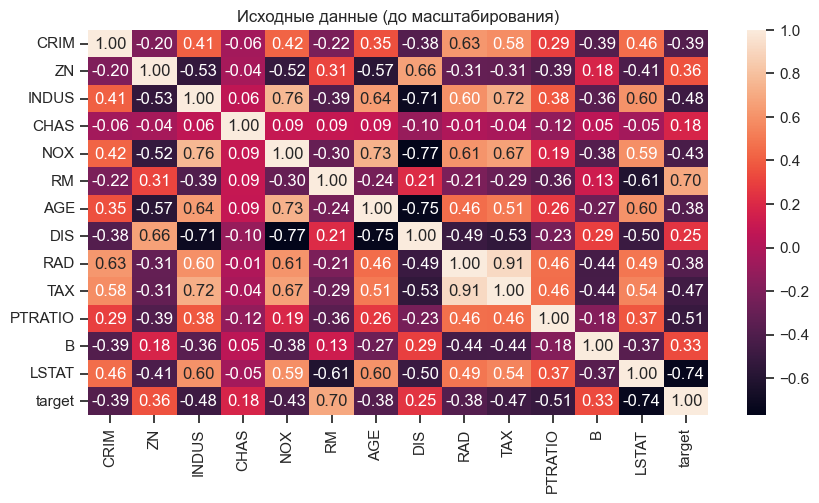

In [18]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(boston_df[corr_cols_1].corr(), annot=True, fmt='.2f')
ax.set_title('Исходные данные (до масштабирования)')
plt.show()

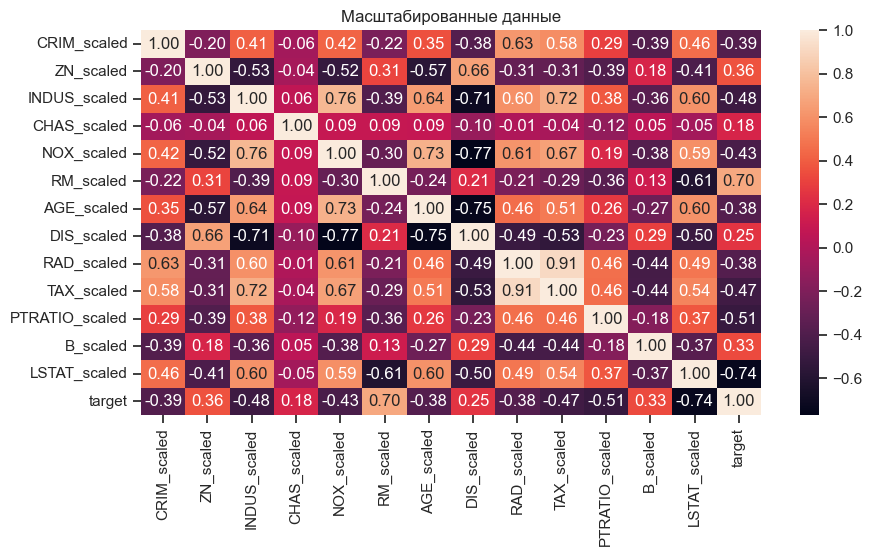

In [19]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(boston_df[corr_cols_2].corr(), annot=True, fmt='.2f')
ax.set_title('Масштабированные данные')
plt.show()

На основе корреляционной матрицы можно сделать следующие выводы:

- Корреляционные матрицы для исходных и масштабированных данных совпадают.
- Целевой признак "target" наиболее сильно коррелирует со средним кол-вом комнат в квартире (0.70), соотношением учеников и учителей по городам (0.51) и покупательской способностью населения (0.74). Эти признаки обязательно следует оставить в модели классификации.
- Большие по модулю значения коэффициентов корреляции свидетельствуют о значимой корреляции между исходными признаками и целевым признаком.  На основании корреляционной матрицы можно сделать вывод о том, что данные позволяют построить модель машинного обучения. 

## Выбор метрик для последующей оценки качества моделей. 

### В качестве метрик для решения задачи регрессии будем использовать:

#### [Mean absolute error](https://en.wikipedia.org/wiki/Mean_absolute_error) - средняя абсолютная ошибка

$MAE(y,\hat{y}) = \frac{1}{N} \cdot \sum\limits_{i=1}^N \lvert  y_i - \hat{y_i} \rvert $

где:
- $y$ - истинное значение целевого признака
- $\hat{y}$ - предсказанное значение целевого признака
- $N$ - размер тестовой выборки

Чем ближе значение к нулю, тем лучше качество регрессии.

Основная проблема метрики состоит в том, что она не нормирована.

Вычисляется с помощью функции [mean_absolute_error.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error)

#### [Mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error) - средняя квадратичная ошибка

$MSE(y,\hat{y}) = \frac{1}{N} \cdot \sum\limits_{i=1}^N ( y_i - \hat{y_i} )^2 $

где:
- $y$ - истинное значение целевого признака
- $\hat{y}$ - предсказанное значение целевого признака
- $N$ - размер тестовой выборки

Вычисляется с помощью функции [mean_squared_error.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)

#### [Median absolute error](https://en.wikipedia.org/wiki/Median_absolute_deviation) - среднее абсолютное отклонение

Вычисляется с помощью функции [median_absolute_error.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.median_absolute_error.html)

### Сохранение и визуализация метрик

Разработаем класс, который позволит сохранять метрики качества построенных моделей и реализует визуализацию метрик качества.

In [20]:
class MetricLogger:
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()    

## Выбор наиболее подходящих моделей для решения задачи классификации или регрессии.

Для задачи регрессии будем использовать следующие модели:
- Линейная регрессия
- Метод ближайших соседей
- Машина опорных векторов
- Решающее дерево
- Случайный лес
- Градиентный бустинг

## Формирование обучающей и тестовой выборок на основе исходного набора данных.

In [21]:
boston_X_train, boston_X_test, boston_y_train, boston_y_test = train_test_split(
    boston.data, boston.target, test_size=0.2, random_state=1)
boston_X_train.shape, boston_X_test.shape, boston_y_train.shape, boston_y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [22]:
# Признаки для задачи регресии
task_regr_cols = corr_cols_2

## Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

### Решение задачи классификации

In [23]:
# Модели
regr_models = {'LogR': LogisticRegression(),
               'KNN_5':KNeighborsRegressor(n_neighbors=5),
               'SVC':SVC(probability=True),
               'Tree':DecisionTreeRegressor(),
               'RF':RandomForestRegressor(),
               'GB':GradientBoostingRegressor()}

In [24]:
# Сохранение метрик
regrMetricLogger = MetricLogger()

In [25]:
def regr_train_model(model_name, model, regrMetricLogger):
    model.fit(boston_X_train, LabelEncoder().fit_transform(boston_y_train))
    Y_pred = model.predict(boston_X_test)
    mae = mean_absolute_error(boston_y_test, Y_pred)
    mse = mean_squared_error(boston_y_test, Y_pred)
    medianAE = median_absolute_error(boston_y_test, Y_pred)

    regrMetricLogger.add('MAE', model_name, mae)
    regrMetricLogger.add('MSE', model_name, mse)
    regrMetricLogger.add('MedianAE', model_name, medianAE)    
    
    print('{} \t MAE={}, MSE={}, MedianAE={}'.format(
        model_name, round(mae, 3), round(mse, 3), round(medianAE, 3)))

In [26]:
for model_name, model in regr_models.items():
    regr_train_model(model_name, model, regrMetricLogger)

LogR 	 MAE=85.531, MSE=9647.103, MedianAE=80.3
KNN_5 	 MAE=78.494, MSE=7451.161, MedianAE=80.1
SVC 	 MAE=176.131, MSE=32577.026, MedianAE=186.7
Tree 	 MAE=76.665, MSE=7849.422, MedianAE=80.3
RF 	 MAE=80.27, MSE=8105.93, MedianAE=75.38
GB 	 MAE=79.488, MSE=8002.42, MedianAE=77.065


## Подбор гиперпараметров для выбранных моделей. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.

### Пример для задачи регрессии

In [27]:
n_range = np.array(range(1,2000,100))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([   1,  101,  201,  301,  401,  501,  601,  701,  801,  901, 1001,
         1101, 1201, 1301, 1401, 1501, 1601, 1701, 1801, 1901])}]

In [28]:
%%time
regr_gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_error')
regr_gs.fit(boston_X_train, boston_y_train)

Wall time: 373 ms


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': array([   1,  101,  201,  301,  401,  501,  601,  701,  801,  901, 1001,
       1101, 1201, 1301, 1401, 1501, 1601, 1701, 1801, 1901])}],
             scoring='neg_mean_squared_error')

In [29]:
# Лучшая модель
regr_gs.best_estimator_

KNeighborsRegressor(n_neighbors=1)

In [30]:
# Лучшее значение параметров
regr_gs.best_params_

{'n_neighbors': 1}

In [31]:
regr_gs_best_params_txt = str(regr_gs.best_params_['n_neighbors'])
regr_gs_best_params_txt

'1'

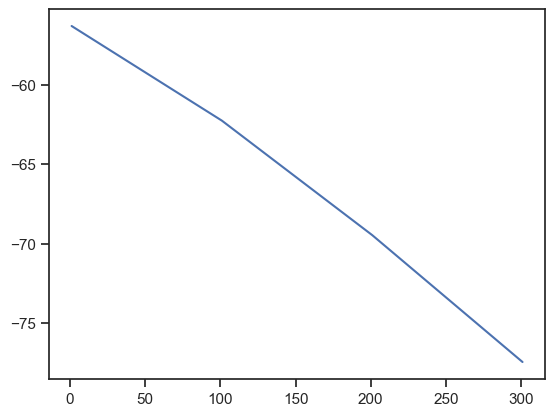

In [32]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, regr_gs.cv_results_['mean_test_score'])

## Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.

### Решение задачи регрессии

In [33]:
regr_models_grid = {'KNN_5':KNeighborsRegressor(n_neighbors=5), 
                    str('KNN_'+regr_gs_best_params_txt):regr_gs.best_estimator_}

In [34]:
for model_name, model in regr_models_grid.items():
    regr_train_model(model_name, model, regrMetricLogger)

KNN_5 	 MAE=78.494, MSE=7451.161, MedianAE=80.1
KNN_1 	 MAE=77.604, MSE=8310.997, MedianAE=76.65


## Формирование выводов о качестве построенных моделей на основе выбранных метрик. Результаты сравнения качества рекомендуется отобразить в виде графиков и сделать выводы в форме текстового описания.

### Решение задачи регрессии

In [35]:
# Метрики качества модели
regr_metrics = regrMetricLogger.df['metric'].unique()
regr_metrics

array(['MAE', 'MSE', 'MedianAE'], dtype=object)

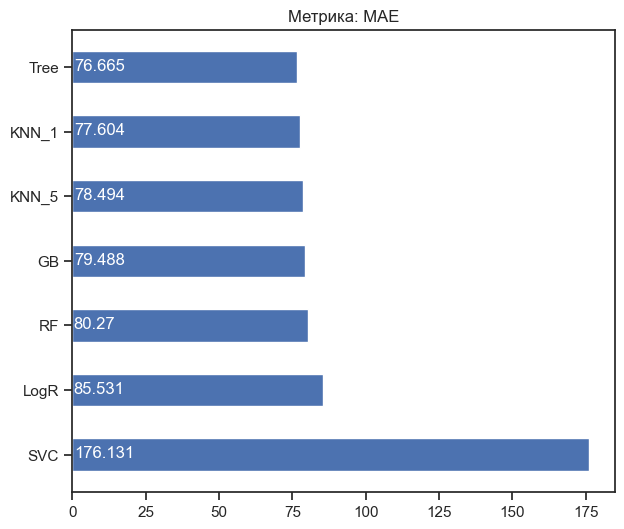

In [36]:
regrMetricLogger.plot('Метрика: ' + 'MAE', 'MAE', ascending=False, figsize=(7, 6))

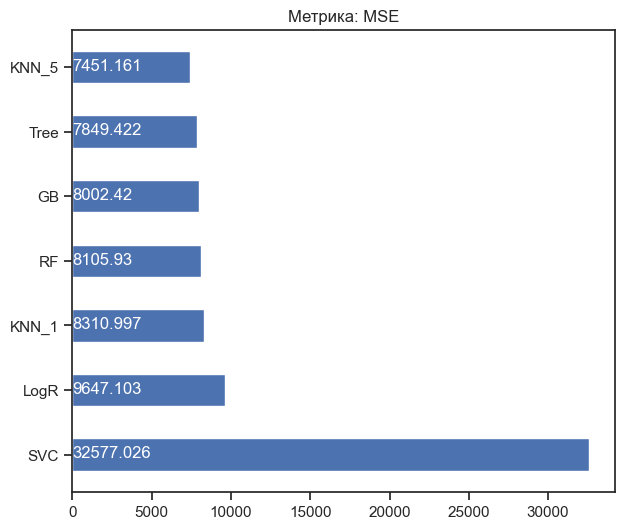

In [37]:
regrMetricLogger.plot('Метрика: ' + 'MSE', 'MSE', ascending=False, figsize=(7, 6))

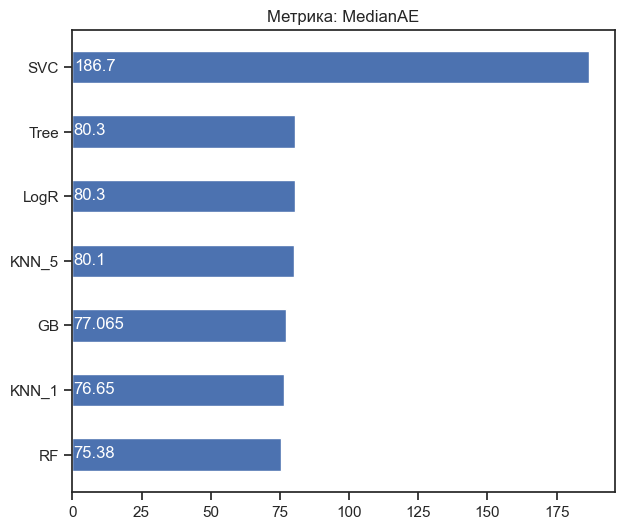

In [38]:
regrMetricLogger.plot('Метрика: ' + 'MedianAE', 'MedianAE', ascending=True, figsize=(7, 6))

**Вывод: лучшими оказались модели на основе линейной регресии и решающего дерева.**